In [1]:
from sklearn.datasets import make_classification
import numpy as np 
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                       n_classes=2,n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15 )

In [2]:
X.shape


(100, 2)

In [3]:
y.shape

(100,)

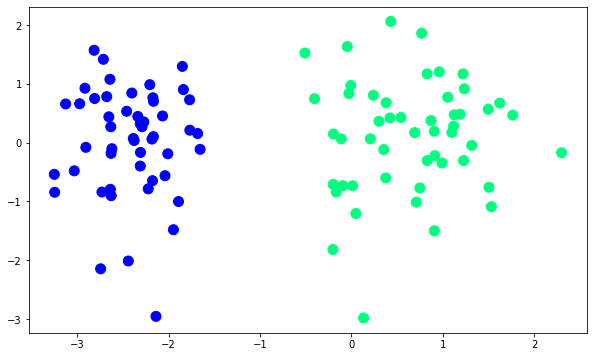

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)

In [7]:
def perceptron(X,y):
     
        w1=w2=b=1
        lr=0.1
        
        for j in range(1000):
            
            for i in range(X.shape[0]):
                
                #check condition 
                z=w1*X[i][0] + w2*X[i][1]+b
                
                if z*y[i] <0:
                    w1=w1+lr*y[i]*X[i][0]
                    w2=w2+lr*y[i]*X[i][0]
                    b=b+lr*y[i]
                    
        return w1,w2,b
                    

In [8]:
w1,w2,b=perceptron(X,y)

In [9]:
b

3.200000000000002

In [10]:
m = -(w1/w2)
c= -(b/w2)

print(m,c)

-1.0 -2.8607000748340004


(-3.0, 2.0)

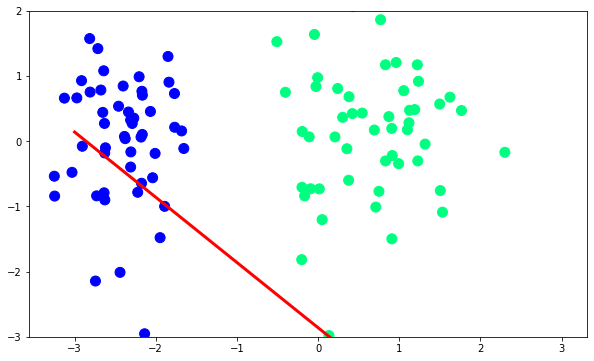

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(100, 2)
(100,)


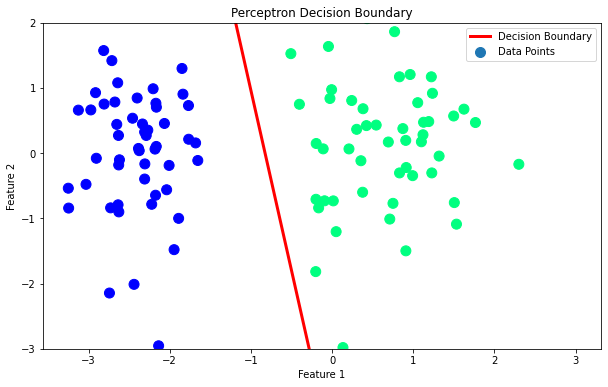

In [16]:
# Cell 1: Generate synthetic data (unchanged)
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)

# Cell 2: Check X shape (unchanged)
print(X.shape)  # Output: (100, 2)

# Cell 3: Check y shape (unchanged)
print(y.shape)  # Output: (100,)

# Cell 4: Implement Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Ensure labels are -1 and 1 for perceptron
        y_ = np.where(y <= 0, -1, 1)
        
        # Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Linear combination
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predicted label
                y_pred = np.sign(linear_output)
                # Update rule: if misclassified, update weights and bias
                if y_pred != y_[idx]:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(np.sign(linear_output) == -1, 0, 1)

# Train perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# Cell 5: Plot data and decision boundary
# Generate points for plotting the decision boundary
x_input = np.linspace(-3, 3, 100)
# Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
y_input = -(perceptron.weights[0] * x_input + perceptron.bias) / perceptron.weights[1]

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100, label='Data Points')
plt.ylim(-3, 2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()